# Text Classification using Bidirectional Encoder Representations from Transformer (BERT) model

## Intro to Natural Language Processing (NLP)
Natural language processing (NLP) is a subfield of computer science, linguistics and artificial intelligence, which focuses on the way computers interact with natural human language. It encompasses a collection of techniques which aids computers in understanding the natural human language. These techniques extracts meaning and grammatical structures from varying levels of human language:

* Phonology
* Morphology
* Lexical
* Syntactic
* Semantic
* Discourse
* Pragmatic

NLP is involved in a variety of tasks, such as text classification, structured prediction, matching, sequential decision process and translation tasks.

## Introduction to BERT model
The BERT model is a natural language processing model proposed by researchers in Google Research in 2018 (https://arxiv.org/abs/1810.04805). It is a pre-trained language model which can be applied to a variety of NLP tasks. The proposed BERT model achieved state-of-the-art performance in a string of NLP tasks. It operates on the premises of transfer learning. 

## Transfer Learning
Transfer learning is a new approach to deep learning where knowledge is transferred from to a new task from a similar task. It can be used to overcome the challenge of a lack of resources in certain NLP tasks. Transfer learning using pre-trained language representations can be achieved in one of two ways. 
* Fine-tuning: Fine-tuning pre-trained language models for NLP tasks. 
* Feature-based: Using pre-trained vector representations or word embeddings as features for NLP tasks.

## BERT Architecture
In essence, the BERT model is a multi-layer stack of transformer architectures. Transformers are encoder-decoder networks in which every output is connected to the input, and the connection is dynamically calculated based upon their connection. For more information on transformers, please refer to this paper (https://arxiv.org/abs/1706.03762). In the original BERT paper (as mentioned above), there are two versions of the BERT architecture, that is BERT<sub><sup>LARGE</sup></sub> which has 24 layers of encoder stack and BERT<sub><sup>BASE</sub></sup> with 12 layers of encoder stacks. The stacks of transformer architecture in BERT is illustrated below:

[<img src="./Images/1_Dtz4GnZ1uYNMIxRC5mKScg.png" width="500"/>](./Images/1_Dtz4GnZ1uYNMIxRC5mKScg.png)

### Encoder layers
The encoder layers consists of two sub-layers which are the multi-head self attention mechanism and the feed forward neural network layers. The attention mechanism is used to know which word in the context better contributes to the current word. The multi-head self attention mechanism works by computing a key-value and query vector for every input token in a sequence, which will be further used to create a weighted representation (for more information on the calculation, please refer to this link: https://www.analyticsvidhya.com/blog/2019/06/understanding-transformers-nlp-state-of-the-art-models/?utm_source=blog&utm_medium=demystifying-bert-groundbreaking-nlp-framework). This allows BERT to learn contextual relation between words. Subsequently, the output of the multi-head self attention mechanism is fed to the feed forward neural network. Each sub-layer in the transformer encoder is connected through residual connection and the output of each sub-layer is normalized.

### Decoder layers
The decoder layers consists of the same sub-layers in the encoder layers, with an additional layer which performs multi-head attention on the output of the encoder layers. This additional layer helps decoder focus on appropriate parts of the sentence. 




## Bidirectionality
The BERT model also distinguishes itself from previous language models due to it's bidirectionality. This is achieved through the pre-training objectives of "Masked Language Modelling" (MLM). The MLM task involves pre-training the model to predict a randomly selected masked word from the input sentence. The use of the MLM pre-training objective allows the BERT model to process text from both left to right and right to left, enabling it to gain more contextual information from the surrounding words in a sequence. As opposed to previous language models, which can only process text from left to right. 

## Demonstration of BERT Model

### Importing libraries and data

In [3]:
#Importing required Python libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", None)
import matplotlib.pyplot as plt

In [4]:
#Loading dataset into the environment
df = pd.read_csv("C:\Project Directories\DSULS\Data\Twitter data.csv")

In [3]:
#Display data
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad"
1,90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican"
2,111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn"
3,186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers"
4,204,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao"
...,...,...,...,...,...,...,...
1039,1763,3,0,0,3,2,&#8220;@coltscommunity @Pacers @nflcolts @indystar #CHUCKSTRONG #GoldSwagger http://t.co/6q5wm3VU&#8221; thats awesome &#127936;+&#127944;=&#128077;&#128076;&#9757; #hoosiers
1040,1799,3,1,0,2,2,&#8220;@fatbellybella: I know u didnt hit that jigga with my fav purse. .. @solangeknowles&#8221;--no chill! &#128514;&#128514;
1041,1805,3,0,0,3,2,&#8220;@ghostriderJ1: Yankees will never have someone wear a single digit uniform again after this season&#8221; Wow. Shows that is an epic organization
1042,1812,3,0,0,3,2,&#8220;@hoppk92: @WCCORosen Sick of all the trash talk and cocky attitudes. #shutupandplay&#8221; Refs have to take control when needed


In [4]:
#Subset the desired columns
df = df.loc[:, ['class', 'tweet']]

In [5]:
#Checking the class distribution of the dataset
#0 = Hate speech, 1 = Offensive 2= Neither
df['class'].value_counts()

0    506
1    276
2    262
Name: class, dtype: int64

[]

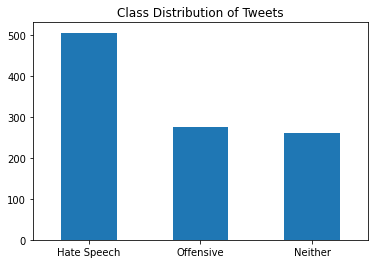

In [6]:
#Display class distribution of the dataset in a bar plot
df['class'].value_counts().plot.bar()
plt.title('Class Distribution of Tweets')
plt.xticks(rotation=360, labels=['Hate Speech', 'Offensive', 'Neither'], ticks=[0, 1, 2])
plt.plot()


In [7]:
#Assimilating the offensive and neither class
#Specifiying the value to be replaced, where hate speech will be assigned into "1" class and offensive and neither will be assigend into "0" class
new_values = {0: 1, 1: 0, 2: 0}

#Replacing the values
df = df.replace(new_values)

In [8]:
#Checking the class distribution of the dataset after assimilating the offensive and neither classes
df['class'].value_counts()

0    538
1    506
Name: class, dtype: int64

[]

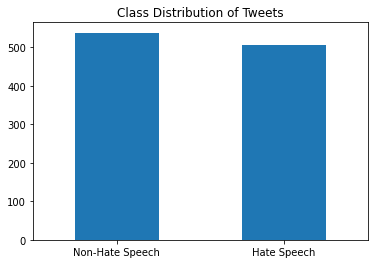

In [9]:
#Display class distribution of the dataset after assimilation in a bar plot
df['class'].value_counts().plot.bar()
plt.title('Class Distribution of Tweets')
plt.xticks(rotation=360, ticks=[0,1], labels=['Non-Hate Speech', 'Hate Speech'])
plt.plot()

### Preprocessing dataset

In [5]:
#Importing required libraries
import html
import preprocessor as p
import string
import nltk
from nltk.corpus import stopwords
from nltk import TweetTokenizer
import regex as re
import emoji
from sklearn.model_selection import train_test_split

In [11]:
#Decoding HTML entities 
df['text'] = df['tweet'].apply(lambda tweet: html.unescape(tweet))

In [12]:
#Displaying dataset after decoding HTML entities
df

,class,tweet,text
0,1,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad","""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad"
1,1,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican","""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican"
2,1,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn","""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn"
3,1,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers","""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers"
4,1,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao","""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao"
...,...,...,...
1039,0,&#8220;@coltscommunity @Pacers @nflcolts @indystar #CHUCKSTRONG #GoldSwagger http://t.co/6q5wm3VU&#8221; thats awesome &#127936;+&#127944;=&#128077;&#128076;&#9757; #hoosiers,“@coltscommunity @Pacers @nflcolts @indystar #CHUCKSTRONG #GoldSwagger http://t.co/6q5wm3VU” thats awesome 🏀+🏈=👍👌☝ #hoosiers
1040,0,&#8220;@fatbellybella: I know u didnt hit that jigga with my fav purse. .. @solangeknowles&#8221;--no chill! &#128514;&#128514;,“@fatbellybella: I know u didnt hit that jigga with my fav purse. .. @solangeknowles”--no chill! 😂😂
1041,0,&#8220;@ghostriderJ1: Yankees will never have someone wear a single digit uniform again after this season&#8221; Wow. Shows that is an epic organization,“@ghostriderJ1: Yankees will never have someone wear a single digit uniform again after this season” Wow. Shows that is an epic organization
1042,0,&#8220;@hoppk92: @WCCORosen Sick of all the trash talk and cocky attitudes. #shutupandplay&#8221; Refs have to take control when needed,“@hoppk92: @WCCORosen Sick of all the trash talk and cocky attitudes. #shutupandplay” Refs have to take control when needed


In [14]:
#Defining a function to remove user mentions and URLs
def remove_mentions_url_reserved(text):
    
    #Setting options for "tweet-preprocessor"
    p.set_options(p.OPT.MENTION, p.OPT.URL, p.OPT.RESERVED)
    clean_text = p.clean(text)
    return(clean_text)

#Removing user mentions and URLs
df['text'] = df['text'].apply(lambda text: remove_mentions_url_reserved(text))

#Displaying dataset after removing user mentions and URLs
df

,class,tweet,text
0,1,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad",""": queer"" gaywad"
1,1,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",""": alsarabsss"" hes a beaner smh you can tell hes a mexican"
2,1,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn",""": you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway"
3,1,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers",""": LMFAOOOO I HATE BLACK PEOPLE "" This is why there's black people and niggers"
4,1,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao",""": ""At least I'm not a nigger"" "" Lmfao"
...,...,...,...
1039,0,&#8220;@coltscommunity @Pacers @nflcolts @indystar #CHUCKSTRONG #GoldSwagger http://t.co/6q5wm3VU&#8221; thats awesome &#127936;+&#127944;=&#128077;&#128076;&#9757; #hoosiers,“ #CHUCKSTRONG #GoldSwagger ” thats awesome 🏀+🏈=👍👌☝ #hoosiers
1040,0,&#8220;@fatbellybella: I know u didnt hit that jigga with my fav purse. .. @solangeknowles&#8221;--no chill! &#128514;&#128514;,“: I know u didnt hit that jigga with my fav purse. .. ”--no chill! 😂😂
1041,0,&#8220;@ghostriderJ1: Yankees will never have someone wear a single digit uniform again after this season&#8221; Wow. Shows that is an epic organization,“: Yankees will never have someone wear a single digit uniform again after this season” Wow. Shows that is an epic organization
1042,0,&#8220;@hoppk92: @WCCORosen Sick of all the trash talk and cocky attitudes. #shutupandplay&#8221; Refs have to take control when needed,“: Sick of all the trash talk and cocky attitudes. #shutupandplay” Refs have to take control when needed


In [15]:
#Defining a function to remove punctuations
def remove_punctuation(text):
  
  #Removing smart quotes
  text = text.replace('“', '')
  text = text.replace('”', '')
  
  #Removing other punctuations
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return(nopunc)

#Remove punctuations
df['text'] = df['text'].apply(lambda text: remove_punctuation(text))

#Displaying dataset after removing punctuations
df

,class,tweet,text
0,1,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad",queer gaywad
1,1,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",alsarabsss hes a beaner smh you can tell hes a mexican
2,1,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn",youre fucking gay blacklisted hoe Holding out for TehGodClan anyway
3,1,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers",LMFAOOOO I HATE BLACK PEOPLE This is why theres black people and niggers
4,1,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao",At least Im not a nigger Lmfao
...,...,...,...
1039,0,&#8220;@coltscommunity @Pacers @nflcolts @indystar #CHUCKSTRONG #GoldSwagger http://t.co/6q5wm3VU&#8221; thats awesome &#127936;+&#127944;=&#128077;&#128076;&#9757; #hoosiers,CHUCKSTRONG GoldSwagger thats awesome 🏀🏈👍👌☝ hoosiers
1040,0,&#8220;@fatbellybella: I know u didnt hit that jigga with my fav purse. .. @solangeknowles&#8221;--no chill! &#128514;&#128514;,I know u didnt hit that jigga with my fav purse no chill 😂😂
1041,0,&#8220;@ghostriderJ1: Yankees will never have someone wear a single digit uniform again after this season&#8221; Wow. Shows that is an epic organization,Yankees will never have someone wear a single digit uniform again after this season Wow Shows that is an epic organization
1042,0,&#8220;@hoppk92: @WCCORosen Sick of all the trash talk and cocky attitudes. #shutupandplay&#8221; Refs have to take control when needed,Sick of all the trash talk and cocky attitudes shutupandplay Refs have to take control when needed


In [16]:
#Lowercasing all text
df['text'] = df['text'].str.lower()

#Displaying english dataset after lowercasing text
df

,class,tweet,text
0,1,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad",queer gaywad
1,1,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",alsarabsss hes a beaner smh you can tell hes a mexican
2,1,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn",youre fucking gay blacklisted hoe holding out for tehgodclan anyway
3,1,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers",lmfaoooo i hate black people this is why theres black people and niggers
4,1,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao",at least im not a nigger lmfao
...,...,...,...
1039,0,&#8220;@coltscommunity @Pacers @nflcolts @indystar #CHUCKSTRONG #GoldSwagger http://t.co/6q5wm3VU&#8221; thats awesome &#127936;+&#127944;=&#128077;&#128076;&#9757; #hoosiers,chuckstrong goldswagger thats awesome 🏀🏈👍👌☝ hoosiers
1040,0,&#8220;@fatbellybella: I know u didnt hit that jigga with my fav purse. .. @solangeknowles&#8221;--no chill! &#128514;&#128514;,i know u didnt hit that jigga with my fav purse no chill 😂😂
1041,0,&#8220;@ghostriderJ1: Yankees will never have someone wear a single digit uniform again after this season&#8221; Wow. Shows that is an epic organization,yankees will never have someone wear a single digit uniform again after this season wow shows that is an epic organization
1042,0,&#8220;@hoppk92: @WCCORosen Sick of all the trash talk and cocky attitudes. #shutupandplay&#8221; Refs have to take control when needed,sick of all the trash talk and cocky attitudes shutupandplay refs have to take control when needed


In [17]:
#Demojize all emojis into words
df['text'] = df['text'].apply(lambda text: emoji.demojize(text, delimiters=(" ", " ")))

#Displaying english dataset after demojization
df

,class,tweet,text
0,1,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad",queer gaywad
1,1,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",alsarabsss hes a beaner smh you can tell hes a mexican
2,1,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn",youre fucking gay blacklisted hoe holding out for tehgodclan anyway
3,1,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers",lmfaoooo i hate black people this is why theres black people and niggers
4,1,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao",at least im not a nigger lmfao
...,...,...,...
1039,0,&#8220;@coltscommunity @Pacers @nflcolts @indystar #CHUCKSTRONG #GoldSwagger http://t.co/6q5wm3VU&#8221; thats awesome &#127936;+&#127944;=&#128077;&#128076;&#9757; #hoosiers,chuckstrong goldswagger thats awesome basketball american_football thumbs_up OK_hand index_pointing_up hoosiers
1040,0,&#8220;@fatbellybella: I know u didnt hit that jigga with my fav purse. .. @solangeknowles&#8221;--no chill! &#128514;&#128514;,i know u didnt hit that jigga with my fav purse no chill face_with_tears_of_joy face_with_tears_of_joy
1041,0,&#8220;@ghostriderJ1: Yankees will never have someone wear a single digit uniform again after this season&#8221; Wow. Shows that is an epic organization,yankees will never have someone wear a single digit uniform again after this season wow shows that is an epic organization
1042,0,&#8220;@hoppk92: @WCCORosen Sick of all the trash talk and cocky attitudes. #shutupandplay&#8221; Refs have to take control when needed,sick of all the trash talk and cocky attitudes shutupandplay refs have to take control when needed


In [18]:
#Displaying stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moy.tianxiang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
#Adding rt and fav in stopwords 
additional = ['rt', 'fav', 'RT', 'FAV']
stopword = set().union(stopwords.words('english'), additional)

#Displaying new list
stopword

{'FAV',
 'RT',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'fav',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out

In [20]:
#Defining negation stop words
negation_words = ['no', 'nor', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                  "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
                  "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
                  'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

#Creating a new list without negation stop words
new_stopwords = [word for word in stopword if word not in negation_words]

#Arrange new list in alphabetical order
new_stopwords = sorted(new_stopwords)

#Display new list 
new_stopwords

['FAV',
 'RT',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'fav',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 'rt',
 's',
 'same',
 'she',
 "she's",
 'should',
 "should've",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 

In [21]:
#Defining tokenizer
tokenizer = TweetTokenizer()

#Removing stopwords
df['text'] = df['text'].apply(lambda text: [word for word in tokenizer.tokenize(text) if not word in new_stopwords])

#Joining lists of words back into sentence
df['text'] = df['text'].apply(lambda text: ' '.join(text))

#Displaying english dataset after removing stopwords
df

,class,tweet,text
0,1,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad",queer gaywad
1,1,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",alsarabsss hes beaner smh tell hes mexican
2,1,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn",youre fucking gay blacklisted hoe holding tehgodclan anyway
3,1,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers",lmfaoooo hate black people theres black people niggers
4,1,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao",least im not nigger lmfao
...,...,...,...
1039,0,&#8220;@coltscommunity @Pacers @nflcolts @indystar #CHUCKSTRONG #GoldSwagger http://t.co/6q5wm3VU&#8221; thats awesome &#127936;+&#127944;=&#128077;&#128076;&#9757; #hoosiers,chuckstrong goldswagger thats awesome basketball american_football thumbs_up OK_hand index_pointing_up hoosiers
1040,0,&#8220;@fatbellybella: I know u didnt hit that jigga with my fav purse. .. @solangeknowles&#8221;--no chill! &#128514;&#128514;,know u didnt hit jigga purse no chill face_with_tears_of_joy face_with_tears_of_joy
1041,0,&#8220;@ghostriderJ1: Yankees will never have someone wear a single digit uniform again after this season&#8221; Wow. Shows that is an epic organization,yankees never someone wear single digit uniform season wow shows epic organization
1042,0,&#8220;@hoppk92: @WCCORosen Sick of all the trash talk and cocky attitudes. #shutupandplay&#8221; Refs have to take control when needed,sick trash talk cocky attitudes shutupandplay refs take control needed


In [22]:
#Subsetting columns required for training
df = df[['text', 'class']]

#Displaying english dataset after subsetting
df

,text,class
0,queer gaywad,1
1,alsarabsss hes beaner smh tell hes mexican,1
2,youre fucking gay blacklisted hoe holding tehgodclan anyway,1
3,lmfaoooo hate black people theres black people niggers,1
4,least im not nigger lmfao,1
...,...,...
1039,chuckstrong goldswagger thats awesome basketball american_football thumbs_up OK_hand index_pointing_up hoosiers,0
1040,know u didnt hit jigga purse no chill face_with_tears_of_joy face_with_tears_of_joy,0
1041,yankees never someone wear single digit uniform season wow shows epic organization,0
1042,sick trash talk cocky attitudes shutupandplay refs take control needed,0


In [23]:
#Train test and validation split with ratio of 60:20:20
train, val= train_test_split(df, train_size=0.8, test_size=0.2,  stratify=df["class"], random_state=7)

train, test = train_test_split(train, train_size=0.75, test_size=0.25, stratify=train["class"], random_state=7)

In [24]:
#Separating features and target variable in train, test and validation datasets
x_train = list(train['text'])
y_train = list(train['class'])

x_val = list(val['text'])
y_val = list(val['class'])

x_test = list(test['text'])
y_test = list(test['class'])

### Building Classification Model with pre-trained BERT model

In [6]:
#Importing required libraries
import tensorflow as tf
import random
import torch
from transformers import TrainingArguments, Trainer, BertTokenizer, BertForSequenceClassification
from transformers.file_utils import is_tf_available, is_torch_available
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import os

In [26]:
#Set seed to ensure reproducibility
def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    if is_tf_available():
        import tensorflow as tf
        tf.random.set_seed(seed)

#Setting seed value as 7
set_seed(7)

In [28]:
#Finding out the average and max word length for train  dataset
print('Average word length for the train dataset is {0:.0f}.'.format(np.mean(train['text'].apply(lambda x: len(x.split())))))
print('Maximum word length for the train dataset is {0:.0f}.'.format(np.max(train['text'].apply(lambda x: len(x.split())))))

Average word length for the train dataset is 8.
Maximum word length for the train dataset is 25.


Text(0.5, 1.0, 'Distribution of text length in words (training dataset)')

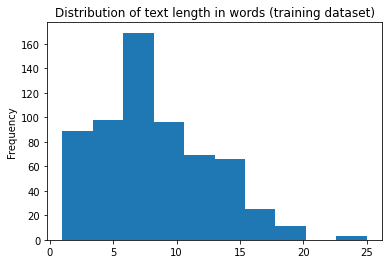

In [29]:
#Plotting distribution of text length in words in training dataset
train['text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.title('Distribution of text length in words (training dataset)')

In [ ]:
#Disabling SSL verification
os.environ["CURL_CA_BUNDLE"]=""

#Choosing pre-trained language model 
#Can find other models in this link: https://huggingface.co/models
model_name = "bert-base-uncased"

#Defining tokenizer 
bert_tokenizer = BertTokenizer.from_pretrained(model_name)

In [ ]:
#Building the English models
model = BertForSequenceClassification.from_pretrained(model_name)

In [34]:
#Tokenizing text with defined bert tokenizer
x_train = bert_tokenizer(x_train, padding=True, truncation=True, max_length=20)
x_val = bert_tokenizer(x_val, padding=True, truncation=True, max_length=20)

In [35]:
#Defining class for torch dataset
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [36]:
#Converting train and validation dataset to torch dataset
train_ds = Dataset(x_train, y_train)
val_ds = Dataset(x_val, y_val)

In [90]:
#Example output of the bert tokenizer
train_ds.__getitem__(0)

{'input_ids': tensor([  101,  2298,  2066,  7574,  7743,  4102,  3763,  3022,  3058,  6616,
          2342,  4827,  5789, 10247, 26419,  2232,   102,     0,     0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]),
 'labels': tensor(1)}

- 'input_ids': a sequence of integers identifying each input token to its index number in the BERT tokenizer vocabulary
- 'token_type_ids': a sequence of 1s and 0s used to identify whether the input is one sentence or two sentences long. For one sentence inputs, this is simply a sequence of 0s. For two sentence inputs, there is a 0 for each token of the first sentence, followed by a 1 for each token of the second sentence
- 'attention_mask': a sequence of 1s and 0s, with 1s for all input tokens (actual words) and 0s for all padding tokens. BERT architecture is based on attention mechanism and this is actual reason for bidirectional behavior of BERT.
- 'labels': a single value of 1 or 0. In our task, 1 represents hate speech and 0 represents non-hate speech.

In [91]:
#Defining a function to compute evaluation metrics
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [92]:
#Defining arguments for training English model 1 using learning rate = 2e-5 and batch size = 32
args = TrainingArguments(
    output_dir="./Runs/1/",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    num_train_epochs=3,
    seed=7,
)

In [93]:
#Defining trainer to train English model 3
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,
)

In [94]:
#Fine-tuning the model
trainer.train()

c:\Project Directories\DSULS\venv\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 626
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 60


  0%|          | 0/60 [00:00<?, ?it/s]



Training completed. Do not forget to share your model on huggingface.co/models =)




{'train_runtime': 192.6698, 'train_samples_per_second': 9.747, 'train_steps_per_second': 0.311, 'train_loss': 0.6003133138020833, 'epoch': 3.0}


TrainOutput(global_step=60, training_loss=0.6003133138020833, metrics={'train_runtime': 192.6698, 'train_samples_per_second': 9.747, 'train_steps_per_second': 0.311, 'train_loss': 0.6003133138020833, 'epoch': 3.0})

In [95]:
#Evaluate performance of model
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 209
  Batch size = 32


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.6088434457778931,
 'eval_accuracy': 0.7033492822966507,
 'eval_precision': 0.7191011235955056,
 'eval_recall': 0.6336633663366337,
 'eval_f1': 0.6736842105263158,
 'eval_runtime': 6.2293,
 'eval_samples_per_second': 33.551,
 'eval_steps_per_second': 1.124,
 'epoch': 3.0}

In [96]:
#Saving model
model_path = "./Models/1/"
model.save_pretrained(model_path)

Configuration saved in ./Models/1/config.json
Model weights saved in ./Models/1/pytorch_model.bin


### Predictions using BERT model

In [97]:
#Tokenizing test data using predefined tokenizer
x_test = bert_tokenizer(x_test, padding=True, truncation=True, max_length=20)

In [98]:
#Converting test data into torch dataset
test_ds = Dataset(x_test, y_test)

In [99]:
#Loading best performing model (English model 3)
model_path = "./Models/1/"
model = BertForSequenceClassification.from_pretrained(model_path) 

loading configuration file ./Models/1/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file ./Models/1/pytorch_model.bin
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initi

In [100]:
#Defining trainer for test data
test_trainer = Trainer(model) 

#Predicting test data
raw_pred, _, _ = test_trainer.predict(test_ds) 

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running Prediction *****
  Num examples = 209
  Batch size = 8


  0%|          | 0/27 [00:00<?, ?it/s]

In [104]:
#Changing shape of raw prediction
y_pred = np.argmax(raw_pred, axis=1)

In [109]:
#Generating evaluation metrics
print('Accuracy for English model is: {0:.2f} '.format(accuracy_score(y_test, y_pred)))
print('Precision for English model is: {0:.2f}'.format(precision_score(y_test,y_pred)))
print('Recall for English model is: {0:.2f}'.format(recall_score(y_test,y_pred)))
print('F-1 score for English model is: {0:.2f}'.format(f1_score(y_test,y_pred)))

Accuracy for English model is: 0.77 
Precision for English model is: 0.76
Recall for English model is: 0.76
F-1 score for English model is: 0.76


In [111]:
#Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Displaying confusion matrix
cm

array([[84, 24],
       [24, 77]], dtype=int64)

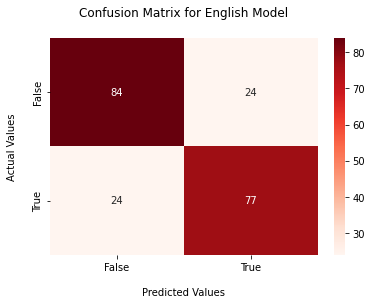

In [112]:
#Plot confusion matrix
eng_cm = sns.heatmap(cm, annot = True, cmap = 'Reds', fmt="d")

eng_cm.set_title('Confusion Matrix for English Model\n')
eng_cm.set_xlabel('\nPredicted Values')
eng_cm.set_ylabel('Actual Values\n')
eng_cm.xaxis.set_ticklabels(['False', 'True'])
eng_cm.yaxis.set_ticklabels(['False', 'True'])
plt.show()